<center>
    Sveučilište u Zagrebu<br>
    Fakultet elektrotehnike i računarstva<br>
    <a href="http://www.fer.unizg.hr/predmet/map">Multivarijatna analiza podataka</a><br>
    Ak. god. 2022./23.    
</center>

<h1>
    Laboratorijska vježba 3: <br> Diskriminantna analiza, metode grupiranja i udaljenosti, analiza korespondencije
</h1>

---

## Uvod i upute za predaju

Rješavanje vježbe svodi se na čitanje uputa u ćelijama s tekstom, nadopunjavanje blokova kôda (možete dodavati i dodatne blokove kôda ukoliko je potrebno) i ispisivanje rezultata (u vidu ispisa iz funkcija, tablica i grafova). Vježbu radite samostalno, a svoje rješenje branite na terminima koji su vam dodijeljeni u kalendaru. **Pritom morate razumjeti teorijske osnove implementiranih rješenja, u okviru onoga što je obrađeno na predavanjima, te morate pokazati da razumijete sav kôd koji ste napisali.** Zadatci u samoj vježbi su istraživačkog tipa  &mdash; ne postoji nužno samo jedan točan način rješavanja svakog zadatka, zato potičemo studente na eksperimentiranje.

Kôd možete pisati u Python ili R programskim jezicima. Ukoliko želite koristiti R, potrebno je instalirati određeni paket prema [ovim jednostavnim uputama](https://datatofish.com/r-jupyter-notebook/), i zatim odabrati R kernel u gornjem desnom kutu. **Osim ako u određenom zadatku ne piše drugačije, za implementaciju rješenja možete koristiti proizvoljne biblioteke.**

**Vaše rješenje potrebno je predati u sustav _Moodle_ u obliku .ipynb datoteke naziva IME_PREZIME_JMBAG.ipynb.** Podsjećamo da bodovi iz laboratorijskih vježbi ulaze i u bodove na ispitnom roku, te da je za polaganje predmeta potrebno imati barem 50% ukupnih bodova iz laboratorijskih vježbi. **Nadoknade laboratorijskih vježbi neće biti organizirane.** Za sva dodatna pitanja svakako se javite na email adresu predmeta: _map@fer.hr_.

---

## Podatkovni skup

U ovoj laboratorijskoj vježbi analizirat ćemo skup podataka s oko 1500 najpoznatijih klasičnih skladbi prema glasovima korisnika stranice [classicalmusiconly.com](https://classicalmusiconly.com/).
Opis varijabli dan je u tablici u nastavku:

<table>
    <thead>
        <tr>
            <th>Naziv stupca</th>
            <th>Opis</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><code>title</code></td>
            <td>naziv skladbe</td>
        </tr>
        <tr>
            <td><code>category</code></td>
            <td>kategorija kojoj skladba pripada<br>(sonata, simfonija, itd.)</td>
        </tr>
        <tr>
            <td><code>composer</code></td>
            <td>ime skladatelja</td>
        </tr>
        <tr>
            <td><code>year</code></td>
            <td>godina kada je skladba napisana</td>
        <tr>
            <td><code>epoch</code></td>
            <td>stilsko razdoblje</td>
        </tr>
        <tr>
            <td><code>country</code></td>
            <td>država rođenja skladatelja</td>
        <tr>
            <td><code>stars</code></td>
            <td>broj glasova <br> (koliko korisnika je označilo skladbu kao favorit))</td>
        </tr>
    </tbody>
</table>

---

Učitajte datoteku `classical_data.csv` i proučite podatke.
Varijable `category`, `composer`, `epoch` i `country` treba tretirati kao da se radi o kategorijskim varijablama.
Ispišite nekoliko redaka iz tablice.

In [1]:
!pip install prince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.6/414.6 kB 9.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import fcluster
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import MDS
import prince

In [3]:
df=pd.read_csv('classical_data.csv', index_col=0)
df.head()

,title,category,composer,year,epoch,country,stars
1,The Four Seasons (Le Quattro Stagioni),Violin Concerto,Antonio Vivaldi,1723,Baroque,Italy,2515
2,"Requiem in D Minor, K. 626",Mass / Requiem,Wolfgang Amadeus Mozart,1791,Classical,Austria,2122
3,"Symphony No. 9 in D Minor, Op. 125",Symphony,Ludwig van Beethoven,1824,Early Romantic,Germany,2084
4,Nocturnes,Piano Sonata,Frédéric Chopin,1846,Romantic,Poland,1999
5,"Swan Lake, Op. 20",Ballet,Pyotr Ilyich Tchaikovsky,1876,Romantic,Russia,1335


## 1. Grupiranje

U ovom zadatku ćemo grupirati kategorije skladbi na temelju njihove sličnosti.

### <b>a)</b> Izračunajte i prikažite <b>kontingencijsku tablicu</b> $\mathbf C$ između <b>skladatelja</b> i <b>kategorija.</b> Element kontingencijske tablice $C_{i, j}$ odgovara ukupnom broju skladbi u $j$-toj kategoriji koje je napisao $i$-ti skladatelj.

In [4]:
contingency_table = pd.crosstab(df['composer'], df['category'])
contingency_table

category,Ballet,Cello Concerto,Cello Sonata,Chant,Choral orchestral,Clarinet Quintet,Clarinet Sonata,Double Concerto,Flute Sonata,Harpsichord conceto,...,Symphony,Triple Concerto,Unsorted Chamber,Unsorted Instrument Sonatas,Unsorted Orchestral,Viola Concerto,Violin Concerto,Violin Sonata,Voice and Orchestra,Wind Concerto
composer,,,,,,,,,,,,,,,,,,,,,
Aaron Copland,2,0,0,0,0,0,0,0,0,0,...,1,0,0,0,4,0,0,0,0,1
Alban Berg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,1,0,0,0
Alessandro Scarlatti,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alexander Borodin,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
Alexander Glazunov,2,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
William Byrd,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
William Walton,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
Witold Lutosławski,0,0,1,0,0,0,0,0,0,0,...,2,0,0,0,3,0,0,0,0,0


---

Prije nego što nastavimo s grupiranjem, željeli bismo smanjiti broj kategorija koje ćemo uzeti u obzir. <br>
###<b>b)</b> Grafički prikažite ukupan broj skladbi po pojedinoj kategoriji, <i>sortirano</i> uzlazno.
Zatim proizvoljno odredite prag, te izbacite sve kategorije (stupce kontingencijske tablice) koje po Vašem kriteriju sadrže premalo skladbi.
Ako nakon izbacivanja u tablici preostanu skladatelji koji imaju ukupno 0 skladbi, izbacite i takve retke. <br>
<b>Prikažite dobivenu tablicu i graf temeljem kojega ste odredili prag.</b>

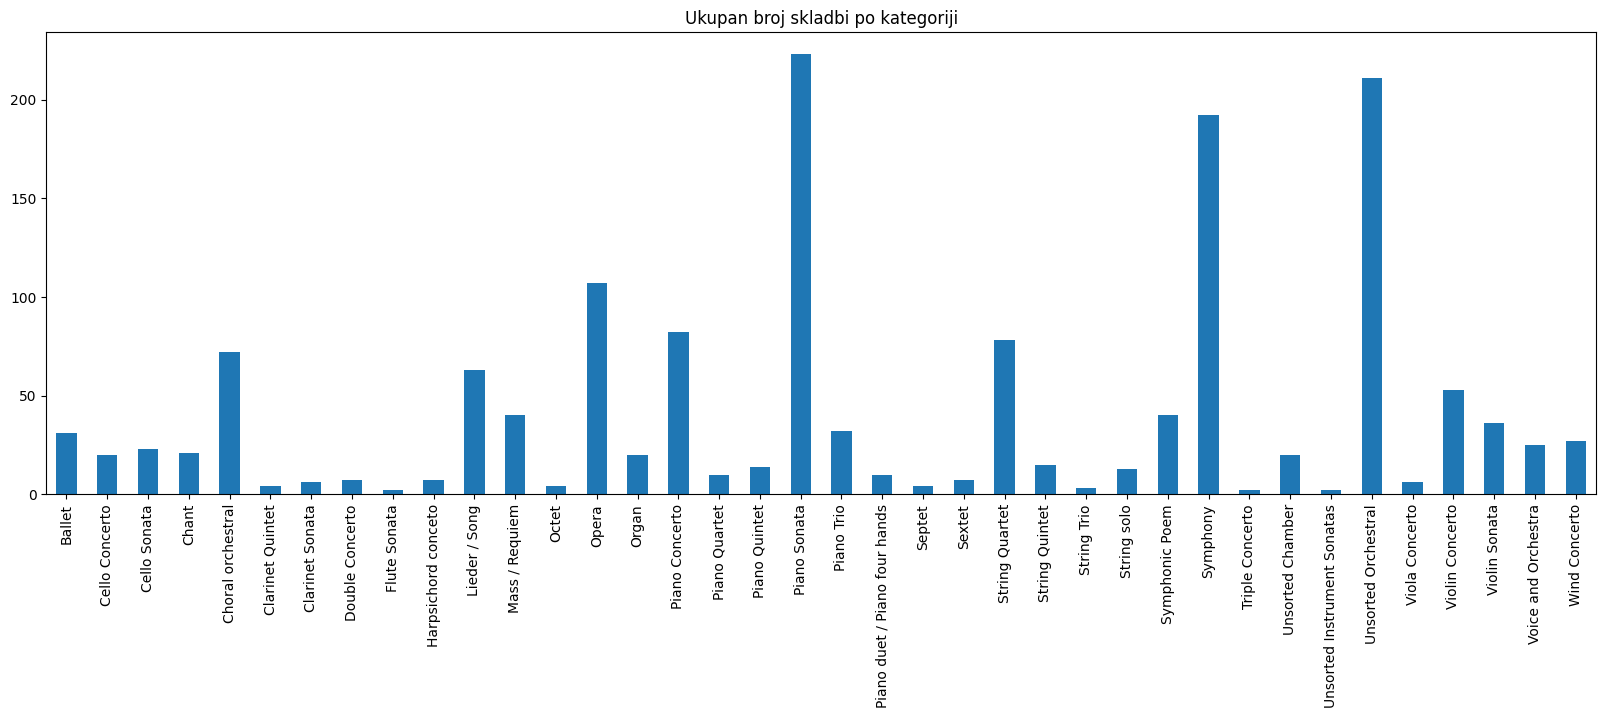

In [5]:
br_skladbi_kategorija = df['category'].value_counts().sort_index()
plt.figure(figsize=(20, 6))
br_skladbi_kategorija.plot(kind='bar')
plt.title('Ukupan broj skladbi po kategoriji')
plt.show()

In [6]:
prag = 15 
odabrane_kategorije = br_skladbi_kategorija[br_skladbi_kategorija >= prag].index.tolist()
new_df = df[df['category'].isin(odabrane_kategorije)]

contingency_table = pd.crosstab(new_df['composer'], new_df['category'])
contingency_table = contingency_table.loc[contingency_table.sum(axis=1) > 0]
contingency_table

category,Ballet,Cello Concerto,Cello Sonata,Chant,Choral orchestral,Lieder / Song,Mass / Requiem,Opera,Organ,Piano Concerto,...,String Quartet,String Quintet,Symphonic Poem,Symphony,Unsorted Chamber,Unsorted Orchestral,Violin Concerto,Violin Sonata,Voice and Orchestra,Wind Concerto
composer,,,,,,,,,,,,,,,,,,,,,
Aaron Copland,2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,4,0,0,0,1
Alban Berg,0,0,0,0,0,1,0,2,0,0,...,1,0,0,0,0,2,1,0,0,0
Alessandro Scarlatti,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alexander Borodin,0,0,0,0,0,0,0,1,0,0,...,2,0,1,3,0,0,0,0,0,0
Alexander Glazunov,2,0,0,0,0,0,0,0,0,1,...,0,0,0,2,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
William Byrd,0,0,0,1,0,0,3,0,0,0,...,0,0,0,0,0,1,0,0,0,0
William Walton,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Witold Lutosławski,0,0,1,0,0,0,0,0,0,1,...,0,0,0,2,0,3,0,0,0,0


---

###<b>c)</b> Provedite hijerarhijsko aglomerativno grupiranje (engl. <i>hierarchical agglomerative clustering</i>) nad <b>kategorijama.</b> Kao mjeru udaljenosti među kategorijama koristite <b>kosinusnu udaljenost</b> među stupcima kontingencijske tablice koju ste prethodno izračunali. Isprobajte različite metode za <b>spajanje grupa</b> (engl. <i>linkage</i>), te:
<ol>
    <li><b>nacrtajte dendrogram</b> za dobiveno grupiranje (vidi <a href="https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html">poveznicu</a> za pomoć),</li>
    <li>prema dendrogramu <b>odredite broj grupa.</b></li>
</ol>
<b>Odaberite jednu metodu povezivanja</b> koja Vam daje rezultate koje najlakše možete interpretirati.
U obzir uzmite balansiranost veličina klastera.
<b>Prikažite dendrogram</b> i <b>ispišite nazive kategorija</b> u pojedinoj grupi u konačnom rezultatu grupiranja.

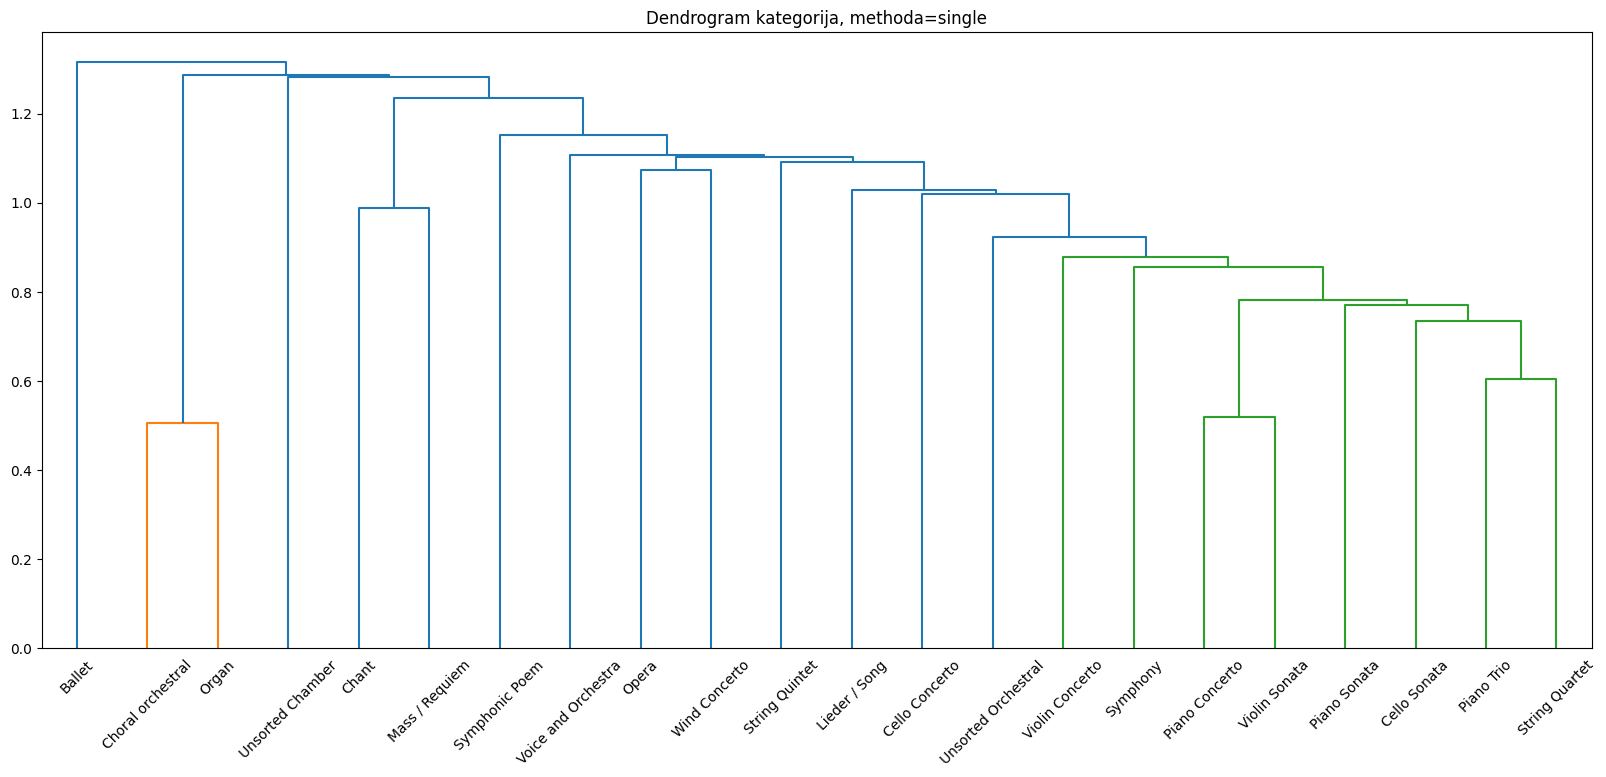

In [7]:
cos_udaljenost=1-cosine_similarity(contingency_table.T)

grupiranje=linkage(cos_udaljenost, method='single') 

plt.figure(figsize=(20, 8))
dendrogram(grupiranje, labels=contingency_table.columns, orientation='top')
plt.title('Dendrogram kategorija, methoda=single')
plt.show()

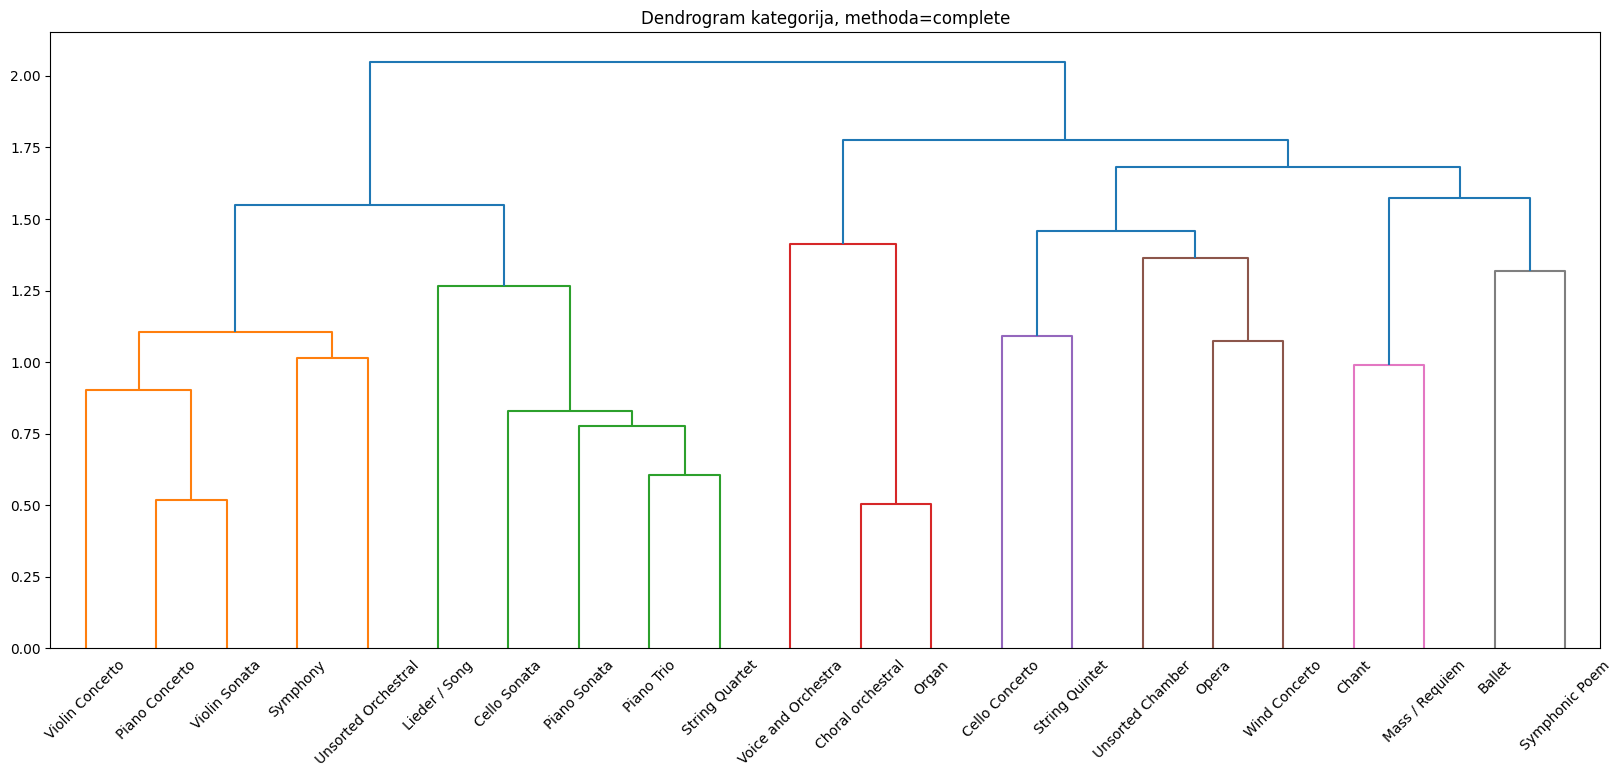

In [8]:
cos_udaljenost=1-cosine_similarity(contingency_table.T)

grupiranje=linkage(cos_udaljenost, method='complete') 

plt.figure(figsize=(20, 8))
dendrogram(grupiranje, labels=contingency_table.columns, orientation='top')
plt.title('Dendrogram kategorija, methoda=complete')
plt.show()

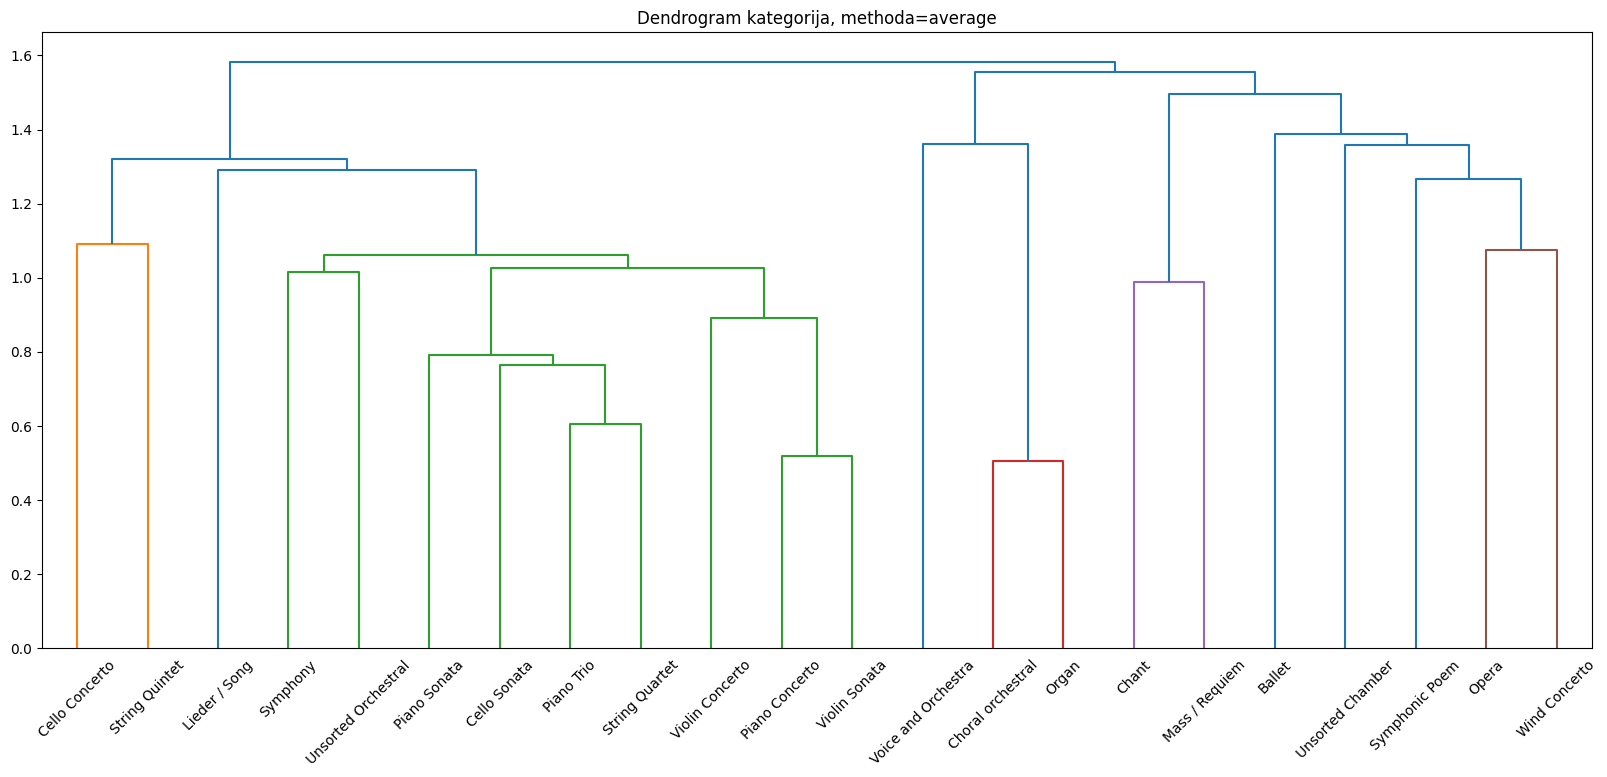

In [9]:
cos_udaljenost=1-cosine_similarity(contingency_table.T)

grupiranje=linkage(cos_udaljenost, method='average') 

plt.figure(figsize=(20, 8))
dendrogram(grupiranje, labels=contingency_table.columns, orientation='top')
plt.title('Dendrogram kategorija, methoda=average')
plt.show()

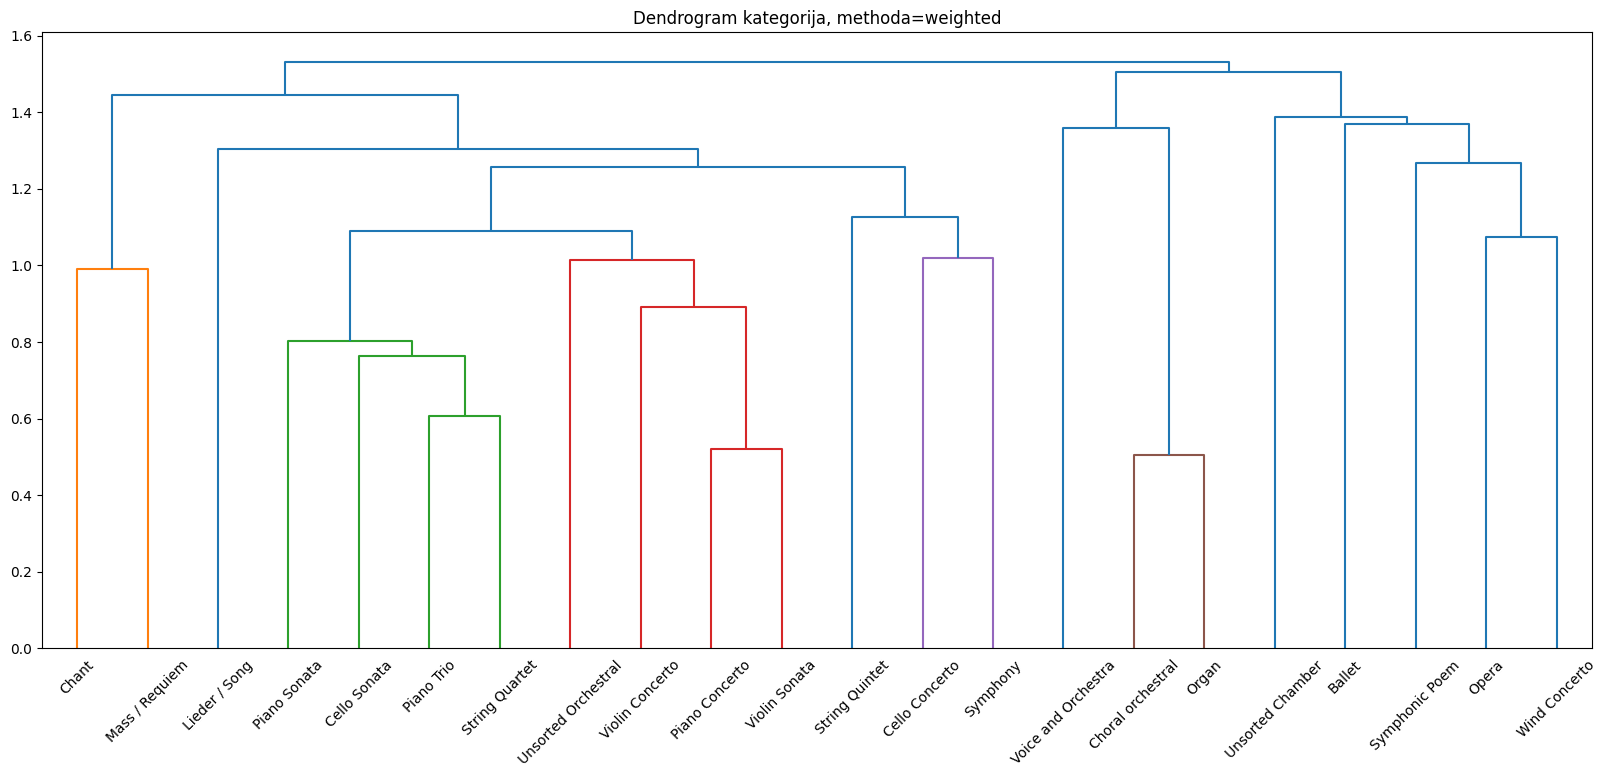

In [10]:
cos_udaljenost=1-cosine_similarity(contingency_table.T)

grupiranje=linkage(cos_udaljenost, method='weighted') 

plt.figure(figsize=(20, 8))
dendrogram(grupiranje, labels=contingency_table.columns, orientation='top')
plt.title('Dendrogram kategorija, methoda=weighted')
plt.show()

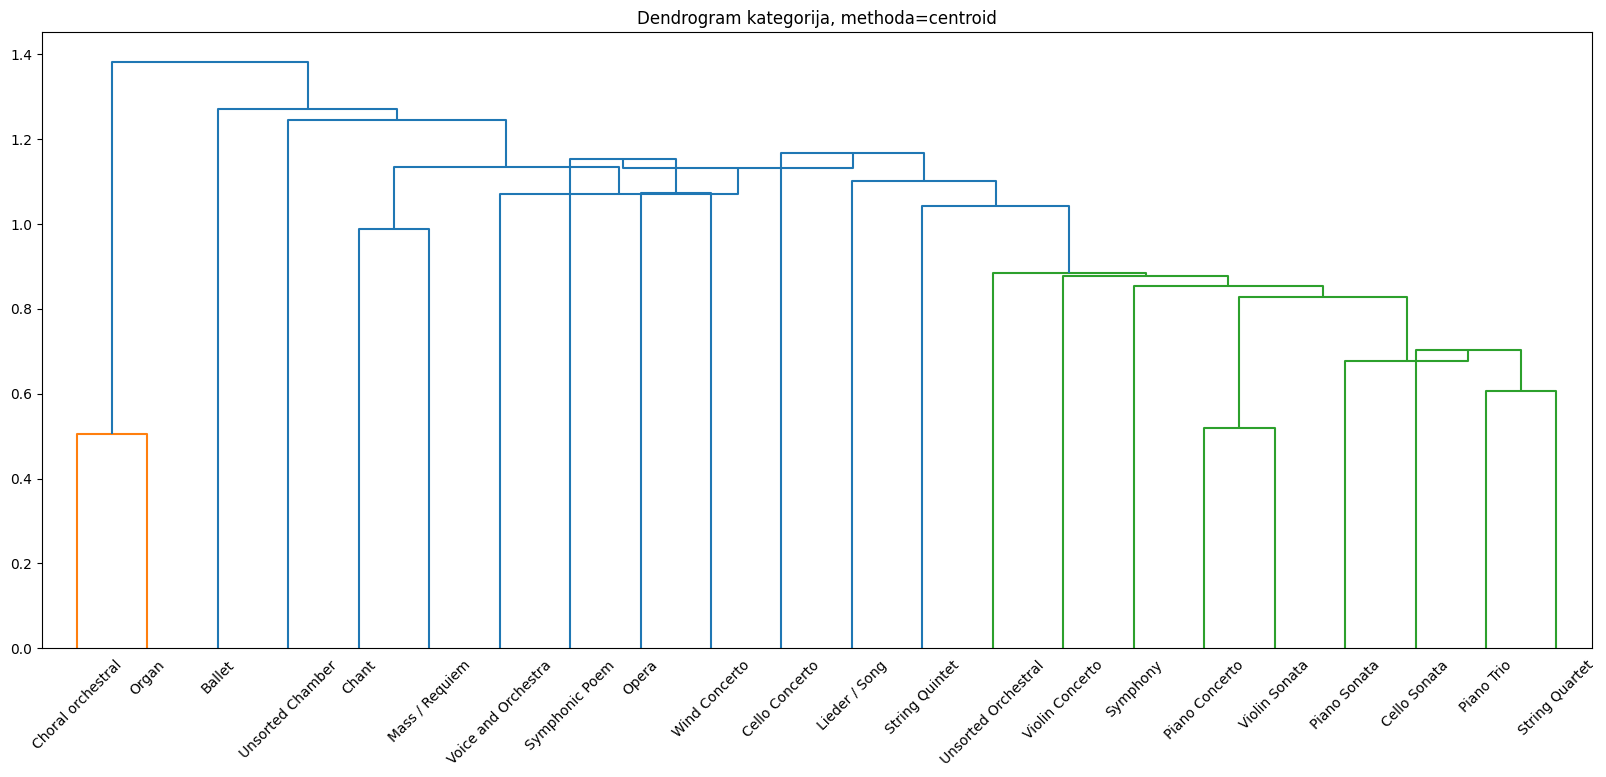

In [11]:
cos_udaljenost=1-cosine_similarity(contingency_table.T)

grupiranje=linkage(cos_udaljenost, method='centroid') 

plt.figure(figsize=(20, 8))
dendrogram(grupiranje, labels=contingency_table.columns, orientation='top')
plt.title('Dendrogram kategorija, methoda=centroid')
plt.show()

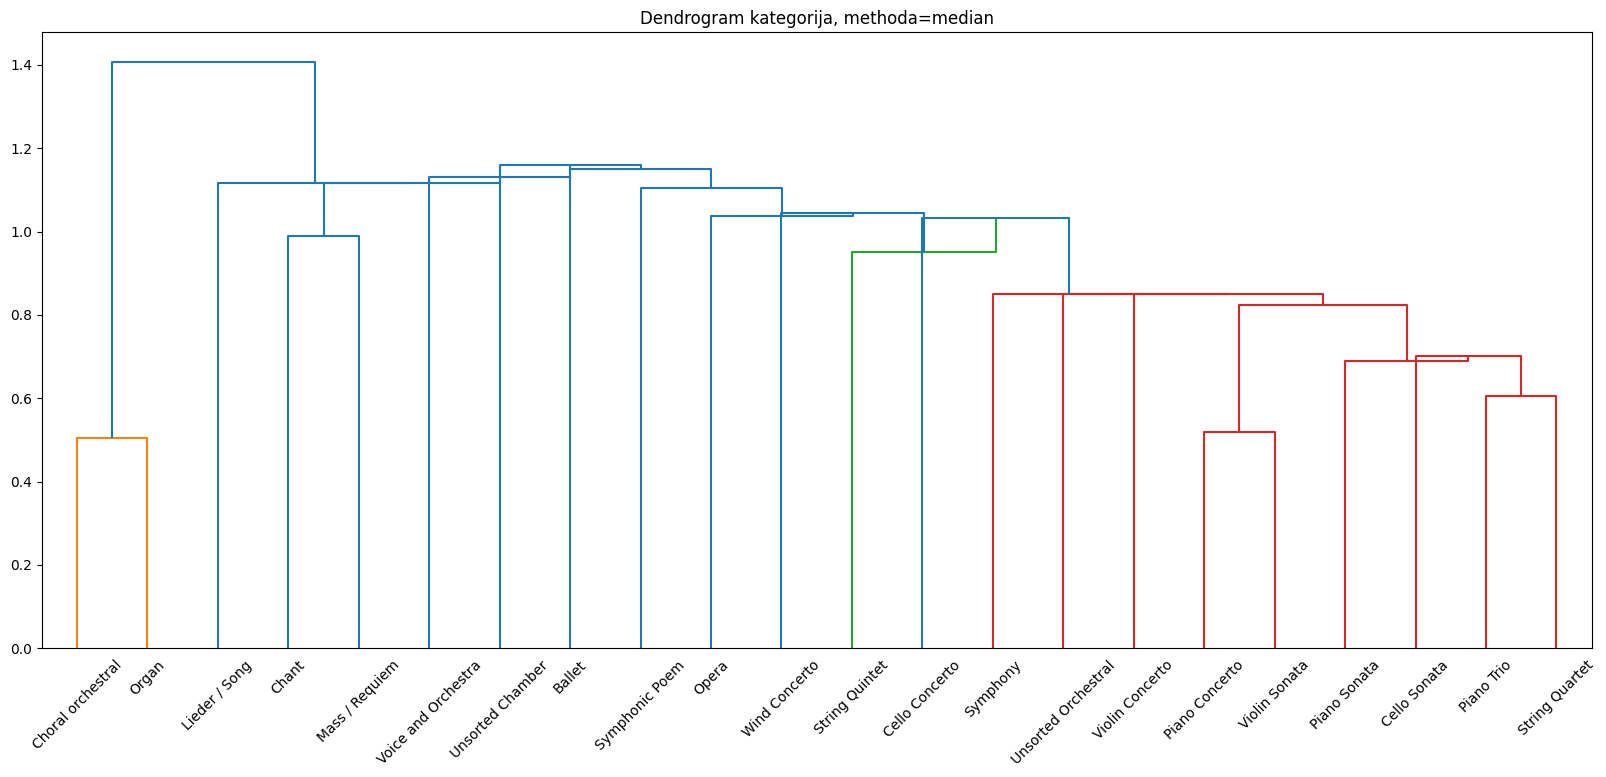

In [12]:
cos_udaljenost=1-cosine_similarity(contingency_table.T)

grupiranje=linkage(cos_udaljenost, method='median') 

plt.figure(figsize=(20, 8))
dendrogram(grupiranje, labels=contingency_table.columns, orientation='top')
plt.title('Dendrogram kategorija, methoda=median')
plt.show()

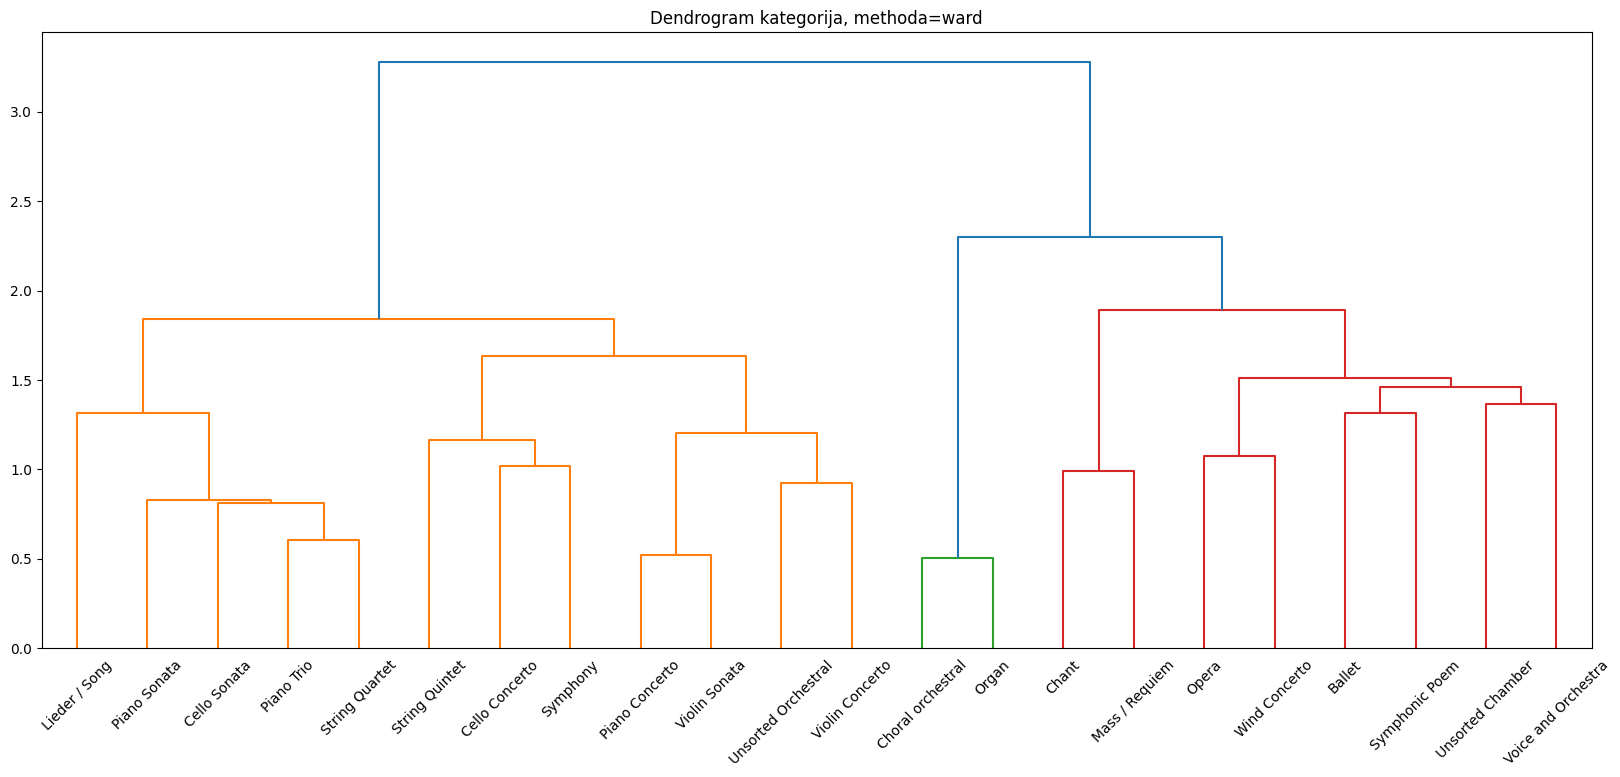

In [13]:
cos_udaljenost=1-cosine_similarity(contingency_table.T)

grupiranje=linkage(cos_udaljenost, method='ward') 

plt.figure(figsize=(20, 8))
dendrogram(grupiranje, labels=contingency_table.columns, orientation='top')
plt.title('Dendrogram kategorija, methoda=ward')
plt.show()

Najbolji se ćini dendogram sa metodom complete.

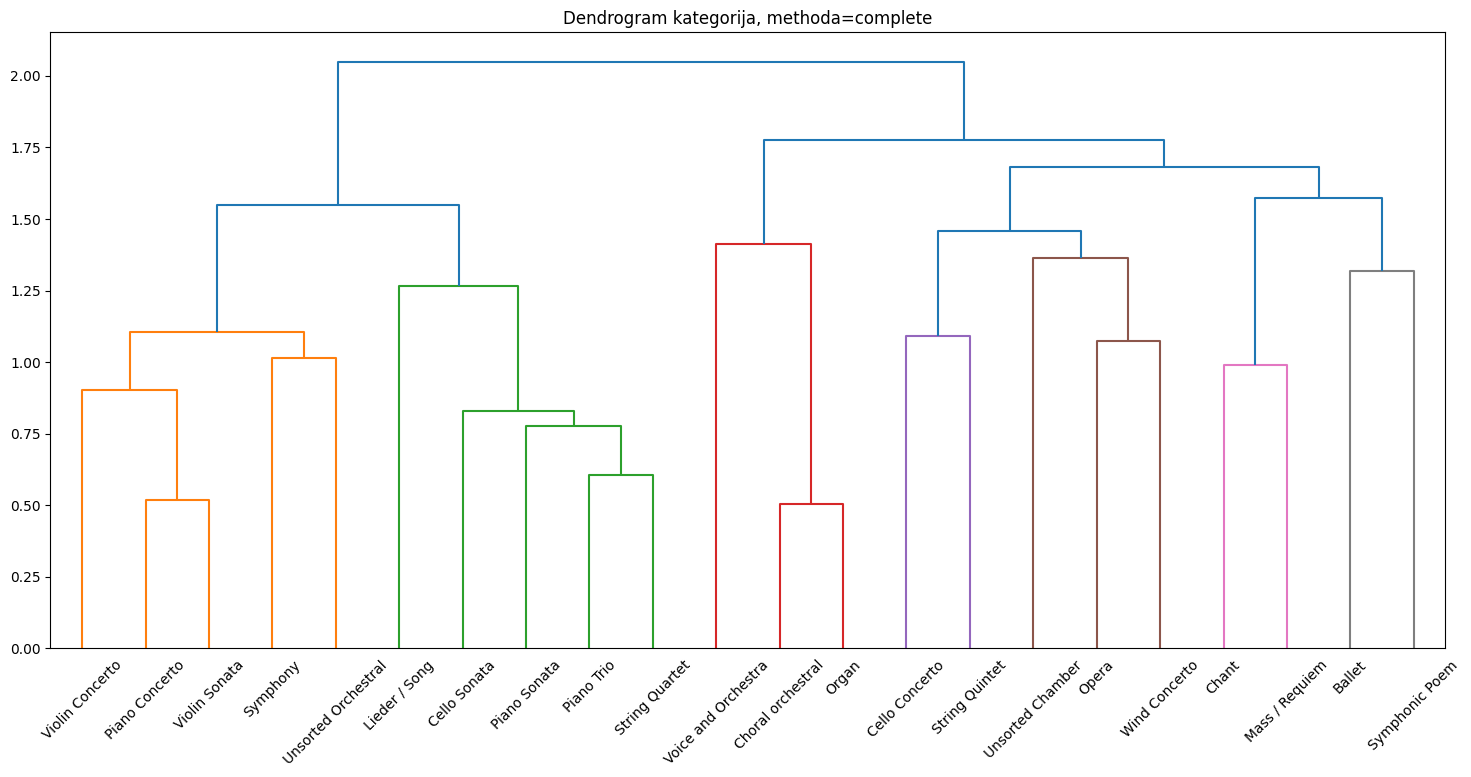

Grupa 1: 
['Piano Concerto', 'Symphony', 'Unsorted Orchestral', 'Violin Concerto', 'Violin Sonata']
Grupa 2: 
['Cello Sonata', 'Lieder / Song', 'Piano Sonata', 'Piano Trio', 'String Quartet']
Grupa 3: 
['Choral orchestral', 'Organ', 'Voice and Orchestra']
Grupa 4: 
['Cello Concerto', 'String Quintet']
Grupa 5: 
['Opera', 'Unsorted Chamber', 'Wind Concerto']
Grupa 6: 
['Chant', 'Mass / Requiem']
Grupa 7: 
['Ballet', 'Symphonic Poem']


In [16]:
cos_udaljenost=1-cosine_similarity(contingency_table.T)

grupiranje=linkage(cos_udaljenost, method='complete') 

plt.figure(figsize=(18, 8))
dendrogram(grupiranje, labels=contingency_table.columns, orientation='top')
plt.title('Dendrogram kategorija, methoda=complete')
plt.show()

br_grupa = 7  

labels = fcluster(grupiranje, br_grupa, criterion='maxclust')

for grupa in range(1, br_grupa + 1):
    kategorije = contingency_table.columns[labels == grupa]
    print("Grupa "+str(grupa)+": ")
    print(kategorije.tolist())

---

## 2. Linearna diskriminantna analiza

U ovom zadatku želimo vizualizirati klasifikaciju skladatelja s obzirom na to kojem stilskom razdoblju pripadaju, koristeći izvedene značajke temeljene na kategorijama skladbi koje su pisali.

---



###<b>a)</b> Izračunajte i prikažite <b>kontingencijsku tablicu</b> $\mathbf C$ između <b>skladatelja</b> i <b>kategorija.</b> Element kontingencijske tablice $C_{i, j}$ odgovara ukupnom broju skladbi u $j$-toj kategoriji koje je napisao $i$-ti skladatelj, kao i u <b>1. a)</b>. Zatim, standardizirajte retke kontingencijske tablice na način da od svakog retka oduzmete njegovu srednju vrijednost, te ga podijelite s njegovom standardnom devijacijom.
<b>Prikažite ovako standardiziranu tablicu</b> te se uvjerite da su srednje vrijednosti svih redaka jednake 0 i njihove devijacije jednake 1.

In [17]:
contingency_table = pd.crosstab(df['composer'], df['category'])
row_means = np.mean(contingency_table, axis=1)
row_std = np.std(contingency_table, axis=1)
standardizirano = (contingency_table.T - row_means).T / row_std[:, np.newaxis]
standardizirano

<ipython-input-17-8bb13e96f547>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  standardizirano = (contingency_table.T - row_means).T / row_std[:, np.newaxis]


category,Ballet,Cello Concerto,Cello Sonata,Chant,Choral orchestral,Clarinet Quintet,Clarinet Sonata,Double Concerto,Flute Sonata,Harpsichord conceto,...,Symphony,Triple Concerto,Unsorted Chamber,Unsorted Instrument Sonatas,Unsorted Orchestral,Viola Concerto,Violin Concerto,Violin Sonata,Voice and Orchestra,Wind Concerto
composer,,,,,,,,,,,,,,,,,,,,,
Aaron Copland,2.447374,-0.287926,-0.287926,-0.287926,-0.287926,-0.287926,-0.287926,-0.287926,-0.287926,-0.287926,...,1.079724,-0.287926,-0.287926,-0.287926,5.182673,-0.287926,-0.287926,-0.287926,-0.287926,1.079724
Alban Berg,-0.404061,-0.404061,-0.404061,-0.404061,-0.404061,-0.404061,-0.404061,-0.404061,-0.404061,-0.404061,...,-0.404061,-0.404061,-0.404061,-0.404061,3.434519,-0.404061,1.515229,-0.404061,-0.404061,-0.404061
Alessandro Scarlatti,-0.209657,-0.209657,-0.209657,-0.209657,5.765567,-0.209657,-0.209657,-0.209657,-0.209657,-0.209657,...,-0.209657,-0.209657,-0.209657,-0.209657,-0.209657,-0.209657,-0.209657,-0.209657,-0.209657,-0.209657
Alexander Borodin,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,...,4.687755,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676
Alexander Glazunov,3.591997,-0.364405,-0.364405,-0.364405,-0.364405,-0.364405,-0.364405,-0.364405,-0.364405,-0.364405,...,3.591997,-0.364405,-0.364405,-0.364405,-0.364405,-0.364405,1.613796,-0.364405,-0.364405,1.613796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
William Byrd,-0.292770,-0.292770,-0.292770,1.561440,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,...,-0.292770,-0.292770,-0.292770,-0.292770,1.561440,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770
William Walton,2.915476,2.915476,-0.342997,-0.342997,-0.342997,-0.342997,-0.342997,-0.342997,-0.342997,-0.342997,...,-0.342997,-0.342997,-0.342997,-0.342997,-0.342997,2.915476,2.915476,-0.342997,-0.342997,-0.342997
Witold Lutosławski,-0.342997,-0.342997,1.286239,-0.342997,-0.342997,-0.342997,-0.342997,-0.342997,-0.342997,-0.342997,...,2.915476,-0.342997,-0.342997,-0.342997,4.544713,-0.342997,-0.342997,-0.342997,-0.342997,-0.342997


In [18]:
print("Mean of each row:")
print(np.mean(standardizirano, axis=1))
print("\nStandard deviation of each row:")
print(np.std(standardizirano, axis=1))

Mean of each row:
composer
Aaron Copland             -4.090295e-17
Alban Berg                 7.304099e-17
Alessandro Scarlatti      -2.775558e-17
Alexander Borodin          3.213803e-17
Alexander Glazunov         7.011935e-17
                               ...     
William Byrd              -5.843279e-17
William Walton             1.022574e-16
Witold Lutosławski         7.888427e-17
Wolfgang Amadeus Mozart   -2.921640e-17
Zoltán Kodály             -1.782200e-16
Length: 126, dtype: float64

Standard deviation of each row:
composer
Aaron Copland              1.0
Alban Berg                 1.0
Alessandro Scarlatti       1.0
Alexander Borodin          1.0
Alexander Glazunov         1.0
                          ... 
William Byrd               1.0
William Walton             1.0
Witold Lutosławski         1.0
Wolfgang Amadeus Mozart    1.0
Zoltán Kodály              1.0
Length: 126, dtype: float64


---

###<b>b)</b> Provedite postupak višeklasne <b>linearne diskriminantne analize</b>.
Klasificirajte skladatelje prema stilskom razdoblju kojem pripadaju (jedan skladatelj pripada samo jednom razdoblju), koristeći stupce prethodno standardizirane kontingencijske tablice iz 2. b) kao značajke.<br>
<b>Prikažite graf raspršenja</b> koristeći prve dvije diskriminante, gdje jedna točka predstavlja jednog skladatelja.
Različitom bojom prikažite različite klase. <br>
<b>Ispišite</b> udjele objašnjene varijance za sve diskriminante. <br>
Koje klase se najbolje razdvajaju od ostalih na dobivenom prikazu?

In [19]:
composer_epoch_dict = {}

for index, row in df.iterrows():
    composer = row['composer']
    epoch = row['epoch']
    composer_epoch_dict[composer] = epoch

composer_epoch_dict = dict(sorted(composer_epoch_dict.items(), key=lambda x: x[0]))

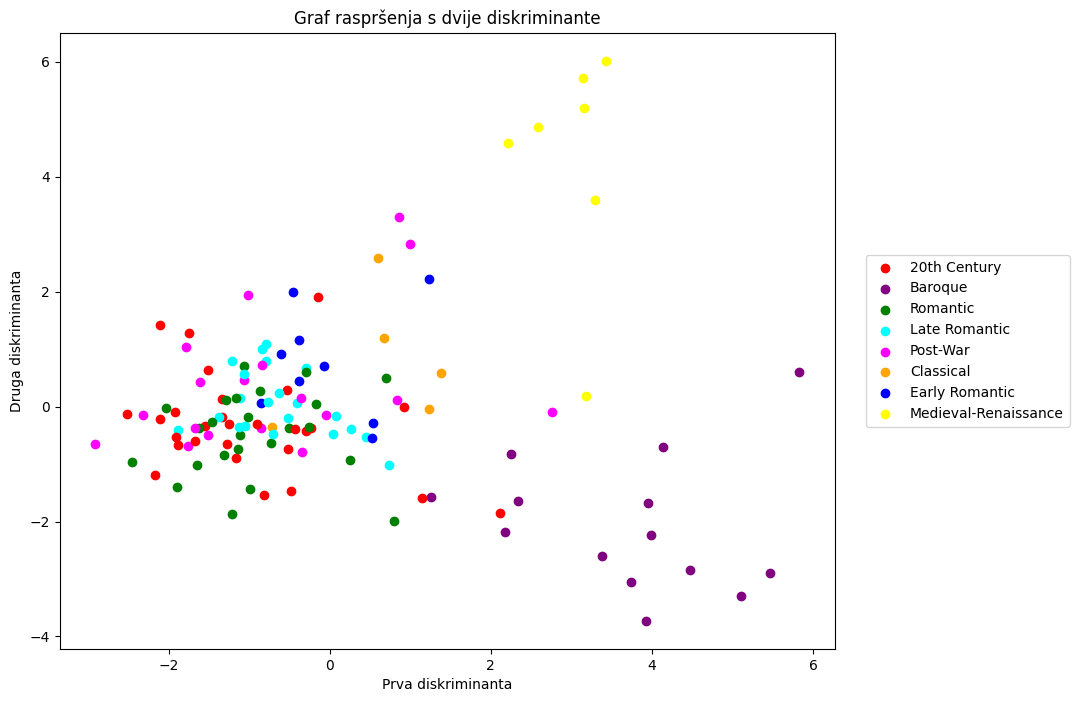

In [20]:
znacajke = standardizirano
target = list(composer_epoch_dict.values())
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(znacajke, target)

transformirane_znacajke = lda.transform(znacajke)

plt.figure(figsize=(10, 8))
prva=transformirane_znacajke[:, 0]
druga=transformirane_znacajke[:, 1]

boje = ['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow']
epoha_boje=dict(zip(set(target), boje))

label_color_dict = {}

for i in range(len(prva)):
    label = target[i]
    color = epoha_boje[target[i]]
    
    if label not in label_color_dict:
        label_color_dict[label] = color
        plt.scatter(prva[i], druga[i], c=color, label=label)
    else:
        plt.scatter(prva[i], druga[i], c=color)


plt.xlabel('Prva diskriminanta')
plt.ylabel('Druga diskriminanta')
plt.title('Graf raspršenja s dvije diskriminante')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show()

In [21]:
objasnjeno = lda.explained_variance_ratio_
for i, varijanca in enumerate(objasnjeno):
    print("Diskriminanta "+str(i)+"objasnjava "+str(varijanca*100)+"% ukupne varijance.")

Diskriminanta 0objasnjava 36.106285252557484% ukupne varijance.
Diskriminanta 1objasnjava 23.215141894095233% ukupne varijance.


Koje klase se najbolje razdvajaju od ostalih na dobivenom prikazu?

Barok i renesansa su najbolje odvojeni od drugih.

---

###<b>c)</b> Ponovite postupak višeklasne <b>linearne diskriminantne analize</b>, ovaj put nad reduciranim skupom podataka koji sadrži samo sljedeća stilska razdoblja:
`
["Baroque", "Classical", "Early Romantic", "Romantic", "Late Romantic"]
`. <br>
<b>Prikažite graf raspršenja</b> koristeći prve dvije diskriminante, gdje jedna točka predstavlja jednog skladatelja.
Različitom bojom prikažite različite klase. <br>
<b>Ispišite</b> udjele objašnjene varijance za sve diskriminante. <br>
Komentirajte kvalitetu dobivenog prikaza u odnosu na prethodni podzadatak.

In [22]:
reduciran_df= df[df['epoch'].isin(["Baroque", "Classical", "Early Romantic", "Romantic", "Late Romantic"])]

In [23]:
contingency_table = pd.crosstab(reduciran_df['composer'], reduciran_df['category'])
row_means = np.mean(contingency_table, axis=1)
row_std = np.std(contingency_table, axis=1)
standardizirano = (contingency_table.T - row_means).T / row_std[:, np.newaxis]
standardizirano

<ipython-input-23-86c1d2dd41cb>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  standardizirano = (contingency_table.T - row_means).T / row_std[:, np.newaxis]


category,Ballet,Cello Concerto,Cello Sonata,Chant,Choral orchestral,Clarinet Quintet,Clarinet Sonata,Double Concerto,Flute Sonata,Harpsichord conceto,...,Symphony,Triple Concerto,Unsorted Chamber,Unsorted Instrument Sonatas,Unsorted Orchestral,Viola Concerto,Violin Concerto,Violin Sonata,Voice and Orchestra,Wind Concerto
composer,,,,,,,,,,,,,,,,,,,,,
Alessandro Scarlatti,-0.209657,-0.209657,-0.209657,-0.209657,5.765567,-0.209657,-0.209657,-0.209657,-0.209657,-0.209657,...,-0.209657,-0.209657,-0.209657,-0.209657,-0.209657,-0.209657,-0.209657,-0.209657,-0.209657,-0.209657
Alexander Borodin,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,...,4.687755,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676
Alexander Glazunov,3.591997,-0.364405,-0.364405,-0.364405,-0.364405,-0.364405,-0.364405,-0.364405,-0.364405,-0.364405,...,3.591997,-0.364405,-0.364405,-0.364405,-0.364405,-0.364405,1.613796,-0.364405,-0.364405,1.613796
Alexander Scriabin,-0.243709,-0.243709,-0.243709,-0.243709,-0.243709,-0.243709,-0.243709,-0.243709,-0.243709,-0.243709,...,1.740777,-0.243709,-0.243709,-0.243709,-0.243709,-0.243709,-0.243709,-0.243709,-0.243709,-0.243709
Anton Bruckner,-0.249523,-0.249523,-0.249523,0.427754,0.427754,-0.249523,-0.249523,-0.249523,-0.249523,-0.249523,...,5.845969,-0.249523,-0.249523,-0.249523,-0.249523,-0.249523,-0.249523,-0.249523,-0.249523,-0.249523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Richard Strauss,-0.348791,-0.348791,-0.348791,-0.348791,-0.348791,-0.348791,-0.348791,-0.348791,-0.348791,-0.348791,...,-0.348791,-0.348791,-0.348791,-0.348791,0.913500,-0.348791,-0.348791,-0.348791,-0.348791,1.544646
Richard Wagner,-0.217357,-0.217357,-0.217357,-0.217357,-0.217357,-0.217357,-0.217357,-0.217357,-0.217357,-0.217357,...,0.470940,-0.217357,-0.217357,-0.217357,-0.217357,-0.217357,-0.217357,-0.217357,-0.217357,-0.217357
Robert Schumann,-0.377292,-0.027607,-0.027607,-0.377292,-0.377292,-0.377292,-0.377292,-0.377292,-0.377292,-0.377292,...,1.021448,-0.377292,-0.377292,-0.377292,0.322078,-0.377292,-0.027607,-0.027607,-0.377292,-0.377292


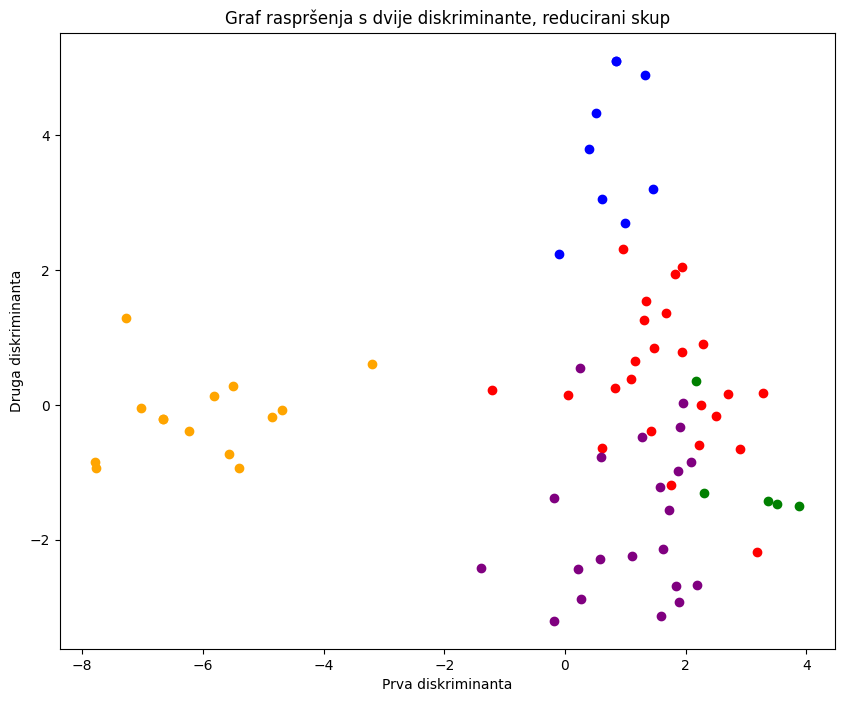

In [25]:
composer_epoch_dict = {}

for index, row in reduciran_df.iterrows():
    composer = row['composer']
    epoch = row['epoch']
    composer_epoch_dict[composer] = epoch

composer_epoch_dict = dict(sorted(composer_epoch_dict.items(), key=lambda x: x[0]))

znacajke = standardizirano
target = list(composer_epoch_dict.values())

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(znacajke, target)

transformirane_znacajke = lda.transform(znacajke)

plt.figure(figsize=(10, 8))

prva=transformirane_znacajke[:, 0]
druga=transformirane_znacajke[:, 1]

boje = ['blue', 'red', 'green', 'orange', 'purple']
epoha_boje=dict(zip(set(target), boje))

label_color_dict = {}

for i in range(len(prva)):
    label = target[i]
    color = epoha_boje[target[i]]
    
    if label not in label_color_dict:
        label_color_dict[label] = color
        plt.scatter(prva[i], druga[i], c=color, label=label)
    else:
        plt.scatter(prva[i], druga[i], c=color)


plt.xlabel('Prva diskriminanta')
plt.ylabel('Druga diskriminanta')
plt.title('Graf raspršenja s dvije diskriminante, reducirani skup')
plt.show()

In [26]:
objasnjeno = lda.explained_variance_ratio_
for i, varijanca in enumerate(objasnjeno):
    print("Diskriminanta "+str(i)+"objasnjava "+str(varijanca*100)+"% ukupne varijance.")

Diskriminanta 0objasnjava 61.1503425402843% ukupne varijance.
Diskriminanta 1objasnjava 19.088393680450626% ukupne varijance.


Više je ukupne varijance objašnjeno ovim drugim pristupom, jer se objašnjava manje razdoblja, te se vidi da se diskriminante lakše fokusiraju.

## 3. Višedimenzionalno skaliranje

U ovom zadatku želimo vizualizirati sličnosti između pojedinih stilskih razdoblja koristeći metričko i nemetričko skaliranje.

###<b>a)</b>
**Izračunajte i prikažite** kontingencijsku tablicu za varijable `category` i `epoch` (stilsko razdoblje).
Neka retci sadrže kategorije, a stupci stilska razdoblja.

In [27]:
contingency_table = pd.crosstab(df['category'], df['epoch'])
contingency_table

epoch,20th Century,Baroque,Classical,Early Romantic,Late Romantic,Medieval-Renaissance,Post-War,Romantic
category,,,,,,,,
Ballet,19,2,0,0,6,0,0,4
Cello Concerto,6,0,5,0,2,0,2,5
Cello Sonata,3,0,0,5,6,0,2,7
Chant,1,0,0,0,2,10,4,4
Choral orchestral,7,42,6,2,5,2,2,6
Clarinet Quintet,0,0,1,1,1,0,0,1
Clarinet Sonata,1,0,0,0,2,0,0,3
Double Concerto,1,1,2,0,0,0,0,3
Flute Sonata,1,1,0,0,0,0,0,0


---

###<b> b)</b> **Izračunajte** udaljenosti među stilskim razdobljima koristeći *totalnu varijacijsku udaljenost*. 
Neka je $C$ kontingencijska matrica dimenzija $N \times M$, te neka su kategorije skladbi raspoređene po retcima, a stilska razdoblja po stupcima. Totalna varijacijska daljenost između dva stilska razdboblja $i$ i $j$ računa se kao
$$
\delta_{i,j} = \frac{1}{2} \sum_{k=1}^N \left\lvert \frac{C_{k,i}}{S_i} - \frac{C_{k,j}}{S_j} \right\rvert,
$$
gdje je $S_i = \sum_{k=1}^N C_{k,i}$. **Izračunajte i prikažite** matricu udaljenosti $\Delta$ čiji elementi su $\Delta_{i, j} = \delta_{i, j}$. <br>
Provjerite koji parovi kategorija su najsličniji, a koji najrazličitiji.

In [40]:
N, M = contingency_table.shape

S = np.sum(contingency_table, axis=0)

delta = np.zeros((M, M))
for i in range(M):
    for j in range(M):
        delta[i, j] = 0.5 * np.sum(np.abs(contingency_table.iloc[:, i]/S[i] - contingency_table.iloc[:, j]/S[j]))

delta_df = pd.DataFrame(delta, columns=['20th Century',	'Baroque',	'Classical',	'Early Romantic',	'Late Romantic',	'Medieval-Renaissance',	'Post-War',	'Romantic'])
delta_df

,20th Century,Baroque,Classical,Early Romantic,Late Romantic,Medieval-Renaissance,Post-War,Romantic
0,0.000000,0.585714,0.420856,0.454386,0.300816,0.770463,0.261111,0.301483
1,0.585714,0.000000,0.651381,0.631880,0.592972,0.751987,0.616013,0.568025
2,0.420856,0.651381,0.000000,0.415740,0.442548,0.800908,0.516751,0.395069
3,0.454386,0.631880,0.415740,0.000000,0.357317,0.737632,0.481725,0.308647
4,0.300816,0.592972,0.442548,0.357317,0.000000,0.769916,0.377731,0.216492
5,0.770463,0.751987,0.800908,0.737632,0.769916,0.000000,0.731419,0.807192
6,0.261111,0.616013,0.516751,0.481725,0.377731,0.731419,0.000000,0.390255
7,0.301483,0.568025,0.395069,0.308647,0.216492,0.807192,0.390255,0.000000


Najrazlicitiji su Medieval-Renaissance i Romantic, a najslicniji su Romantic i Late Romantic

---

###<b>c)</b>
Provedite postupak klasičnog, <b>metričnog višedimenzionalnog skaliranja,</b> koristeći prethodno dobivenu <b>matricu udaljenosti.</b><br>
**Prikažite** kategorije na grafu raspršenja s **dvije dimenzije** i **označite** koju kategoriju pojedina točka predstavlja. 
<b>Ispišite</b> <i>stress</i> vrijedost.<br>
Uočavate li smisleno grupiranje kategorija prema njihovom povijesnom slijedu?

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


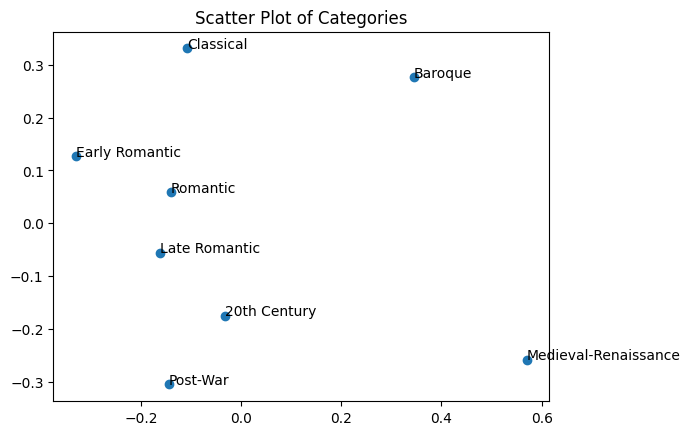

In [41]:
mds = MDS(n_components=2, dissimilarity='precomputed')
X = mds.fit_transform(delta)

plt.scatter(X[:, 0], X[:, 1])

for i, category in enumerate(contingency_table.columns, 0):
    plt.annotate(category, (X[i, 0], X[i, 1]))

plt.title('Scatter Plot of Categories')
plt.show()

In [42]:
stress = mds.stress_
print('Stress:', stress)

Stress: 0.3209080972781801


Vide se slicnosti razdoblja koja su blizu u povijeti poput, grupiranja svih romantickih razdoblja i pos-war je blizi 20th century.

--- 

###<b>d)</b> Neka je $\mathbf C$ kontingencijska tablica s početka ovog zadatka.
Neka je mjera sličnosti između dvaju stilskih razdoblja $i$ i $j$ definirana na način:
\begin{equation}
\mathit{sim}\left(i, j\right) = \sum_{k = 0}^N \frac{\min \left\{C_{k, i}, C_{k, j} \right\}}{\max \left\{C_{k, i}, C_{k, j}\right\}}
\end{equation}
<b>Izračunajte sličnosti</b> između svih parova stilskih razdoblja. Zatim, sami izvedite neku mjeru različitosti temeljem izračunate mjere sličnosti.
Konačno, <b>izračunajte matricu različitosti</b> koja sadrži različitosti svih parova stilskih razdoblja.<br>
Kako se rezultati razlikuju u odnosu na 3. b)?

In [44]:
N, M = contingency_table.shape

slicnosti = np.zeros((M, M))

for i in range(M):
    for j in range(M):
        sim = 0
        for k in range(N):
            if contingency_table.iloc[k, i] == 0 or contingency_table.iloc[k, j] == 0:
                sim += 0
            else:
                sim += min(contingency_table.iloc[k, i], contingency_table.iloc[k, j]) / max(contingency_table.iloc[k, i], contingency_table.iloc[k, j])
        slicnosti[i, j] = sim

slicnosti_df = pd.DataFrame(slicnosti, columns=['20th Century',	'Baroque',	'Classical',	'Early Romantic',	'Late Romantic',	'Medieval-Renaissance',	'Post-War',	'Romantic'])
slicnosti_df

,20th Century,Baroque,Classical,Early Romantic,Late Romantic,Medieval-Renaissance,Post-War,Romantic
0,33.000000,9.621821,11.823717,12.831220,13.586128,2.447254,13.992280,15.793201
1,9.621821,19.000000,4.693694,6.847619,5.658397,2.115402,6.201235,4.586382
2,11.823717,4.693694,22.000000,11.961691,10.780894,2.602381,8.781366,10.425243
3,12.831220,6.847619,11.961691,26.000000,12.985162,3.510294,10.225855,12.115599
4,13.586128,5.658397,10.780894,12.985162,27.000000,2.383279,10.223074,15.000967
5,2.447254,2.115402,2.602381,3.510294,2.383279,10.000000,4.229932,2.404182
6,13.992280,6.201235,8.781366,10.225855,10.223074,4.229932,24.000000,9.657455
7,15.793201,4.586382,10.425243,12.115599,15.000967,2.404182,9.657455,30.000000


In [48]:
razlicitosti = 1/(np.sqrt(slicnosti))
razlicitosti_df = pd.DataFrame(razlicitosti, columns=['20th Century',	'Baroque',	'Classical',	'Early Romantic',	'Late Romantic',	'Medieval-Renaissance',	'Post-War',	'Romantic'])
razlicitosti_df

,20th Century,Baroque,Classical,Early Romantic,Late Romantic,Medieval-Renaissance,Post-War,Romantic
0,0.174078,0.322382,0.290819,0.279168,0.271301,0.639235,0.267335,0.251631
1,0.322382,0.229416,0.461575,0.382147,0.420391,0.687549,0.401570,0.466944
2,0.290819,0.461575,0.213201,0.289137,0.304560,0.619890,0.337457,0.309711
3,0.279168,0.382147,0.289137,0.196116,0.277509,0.533738,0.312716,0.287295
4,0.271301,0.420391,0.304560,0.277509,0.192450,0.647758,0.312759,0.258191
5,0.639235,0.687549,0.619890,0.533738,0.647758,0.316228,0.486221,0.644936
6,0.267335,0.401570,0.337457,0.312716,0.312759,0.486221,0.204124,0.321787
7,0.251631,0.466944,0.309711,0.287295,0.258191,0.644936,0.321787,0.182574


---

###<b>e)</b>
Provedite postupak <b>nemetričnog višedimenzionalnog skaliranja,</b> koristeći prethodno dobivenu <b>matricu različitosti.</b> <br>
**Prikažite** kategorije na grafu raspršenja s **dvije dimenzije** i **označite** koju kategoriju pojedina točka predstavlja. 
<b>Ispišite</b> <i>stress</i> vrijedost.<br>
Uočavate li smisleno grupiranje kategorija prema njihovom povijesnom slijedu?

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


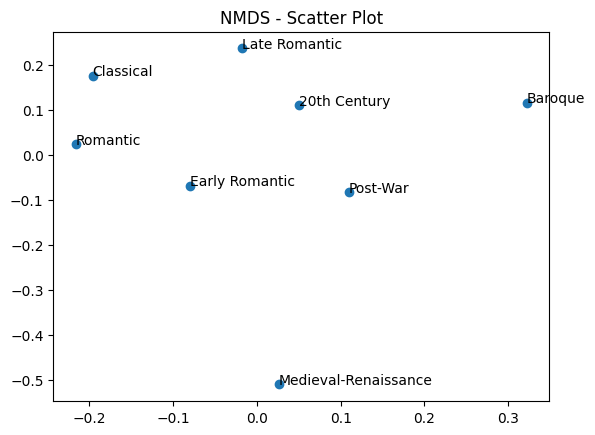

In [49]:
mds = MDS(n_components=2, dissimilarity='precomputed')
X = mds.fit_transform(razlicitosti)

plt.scatter(X[:, 0], X[:, 1])
for i, category in enumerate(contingency_table.columns, 0):
    plt.annotate(category, (X[i, 0], X[i, 1]))

plt.title('NMDS - Scatter Plot')
plt.show()


In [50]:
stress = mds.stress_
print('Stress:', stress)

Stress: 0.3572932907468938


Grupiranje je losije nego ranije ali jos uvijek ima nekog smisla.

---

## 4. Analiza korespondencije

###<b>a) </b>
**Kreirajte** novi podskup podataka tako da sadrži samo skladbe **prvih 5&ndash;10 skladatelja** po nekom kriteriju &mdash; proizvoljno odaberite kriterij po kojemu ćete ih poredati (npr. ukupan broj skladbi, ukupan broj glasova po svim skladbama, prosječan broj glasova po svim skladbama, ili samo odaberite 5&ndash;10 skladatelja po vlastitom izboru).
Zatim **odredite** koje kategorije skladbi se najčešće pojavljuju u dobivenom podskupu, te unutar njega zadržite samo skladbe koje pripadaju otprlike **5&ndash;10 najčešćih kategorija**.

In [52]:
df['br_skladbi'] = df.groupby('composer')['title'].transform('count')

sortirani_skladatelji = df.groupby('composer')['br_skladbi'].max().sort_values(ascending=False)
sortirani_skladatelji = sortirani_skladatelji.head(10).index.tolist()

odabrani_df = df[df['composer'].isin(sortirani_skladatelji)]

najcesece_kategorije = odabrani_df['category'].value_counts().head(10).index.tolist()

final_df = odabrani_df[odabrani_df['category'].isin(najcesece_kategorije)]
final_df

,title,category,composer,year,epoch,country,stars,br_skladbi
3,"Symphony No. 9 in D Minor, Op. 125",Symphony,Ludwig van Beethoven,1824,Early Romantic,Germany,2084,79
6,"Toccata and Fugue in D Minor, BWV 565",Organ,Johann Sebastian Bach,-1,Baroque,Germany,1311,64
7,"Brandenburg Concertos, BWV 1046–1051",Unsorted Orchestral,Johann Sebastian Bach,1721,Baroque,Germany,1263,64
8,"Symphony No. 5 in C Minor, Op. 67",Symphony,Ludwig van Beethoven,1808,Early Romantic,Germany,1251,79
10,"Symphony No. 7 in A Major, Op. 92",Symphony,Ludwig van Beethoven,1812,Early Romantic,Germany,1101,79
...,...,...,...,...,...,...,...,...
1520,"4 Songs, Op. 43",Lieder / Song,Johannes Brahms,1864,Romantic,Germany,1,54
1526,"Symphony No. 101 in D Major, H. 1/101",Symphony,Joseph Haydn,1794,Classical,Austria,1,40
1527,"Symphony No. 6 in C Major (Little C major), D....",Symphony,Franz Schubert,1818,Early Romantic,Austria,1,52
1529,"Piano Sonata, Hob. XVI/50",Piano Sonata,Joseph Haydn,1794,Classical,Austria,1,40


---

U nastavku vježbe koristite ovako generirani podskup podataka.

###<b>b)</b>**Izračunajte i prikažite** kontingencijsku tablicu između skladatelja i kategorije skladbi koje su napisali.


In [53]:
contingency_table = pd.crosstab(final_df['composer'], final_df['category'])
contingency_table

category,Choral orchestral,Lieder / Song,Organ,Piano Concerto,Piano Sonata,Piano Trio,String Quartet,Symphony,Unsorted Orchestral,Violin Sonata
composer,,,,,,,,,,
Béla Bartók,0,1,0,3,4,1,6,0,5,2
Claude Debussy,0,3,0,1,12,0,1,0,5,1
Dmitri Shostakovich,0,1,0,2,1,1,7,12,3,0
Franz Schubert,1,16,0,0,12,3,4,6,1,1
Johann Sebastian Bach,18,0,12,0,14,0,0,0,2,1
Johannes Brahms,1,4,1,2,8,5,3,4,6,3
Joseph Haydn,2,0,0,1,5,1,3,22,0,0
Ludwig van Beethoven,0,1,0,5,26,3,15,9,3,4
Robert Schumann,0,5,0,3,17,2,1,4,2,1


---

###<b>c)</b> **Prikažite** graf raspršenja analize korespondencije između varijabli `composer` i `category` koristeći prve dvije komponente. 
Jasno <b>označite</b> (bojom i oblikom markera, ili natpisima) kojeg skladatelja, odnosno kategoriju, predstavlja pojedina točka.
<b>Ispišite</b> udjele objašnjene varijance za sve komponente, te ukupnu inerciju.
Također, na grafu <b>označite ishodište</b> radi lakše interpretacije. <br>
Obratite pozornost na objašnjenu varijancu temeljem prve dvije komponente. Na temelju dobivenog grafa i kontingencijske tablice iz prethodnog zadatka pokušajte odgovoriti na sljedeća pitanja:

-   Koji skladatelji se najviše izdvajaju po pojedinoj kategoriji?
-   Koji skladatelji su određenu kategoriju skladbi pisali znatno više ili manje u usporedbi s drugim skladateljima?
-   Koji skladatelji su određenu kategoriju skladbi pisali znatno više ili manje u usporedbi s drugim kategorijama?
-   Koji skladatelji su pisali prosječan broj skladbi u svim kategorijama?

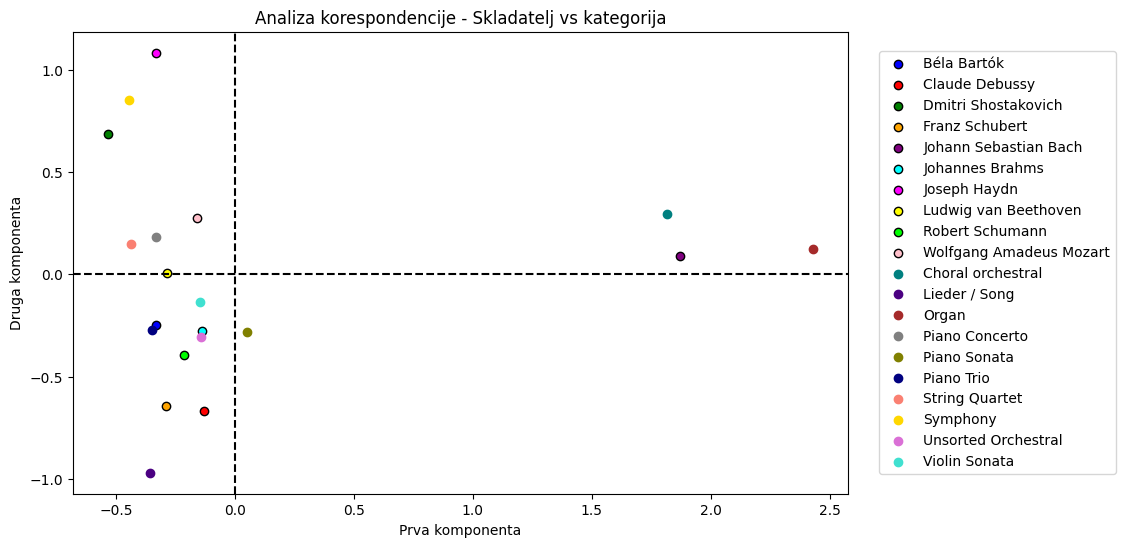

In [54]:
ak = prince.CA(n_components=2)
ak.fit(contingency_table)

redovi = ak.row_coordinates(contingency_table)
stupci = ak.column_coordinates(contingency_table)

skladatelji = contingency_table.index.tolist()
kategorije = contingency_table.columns.tolist()

x_skladatelji = redovi.iloc[:, 0]
y_skladatelji = redovi.iloc[:, 1]
x_kategorije = stupci.iloc[:, 0]
y_kategorije = stupci.iloc[:, 1]

boje_skladatelji = ['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'lime', 'pink']
boje_kategorije = ['teal', 'indigo', 'brown', 'gray', 'olive', 'navy', 'salmon','gold', 'orchid', 'turquoise']

plt.figure(figsize=(10, 6))
for i, skladatelj in enumerate(skladatelji):
    plt.scatter(x_skladatelji[i], y_skladatelji[i], c=boje_skladatelji[i], label=skladatelj, edgecolors='black')

for i, kategorija in enumerate(kategorije):
    plt.scatter(x_kategorije[i], y_kategorije[i], c=boje_kategorije[i], label=kategorija)

plt.axhline(0, color='black', linestyle='dashed')
plt.axvline(0, color='black', linestyle='dashed')

plt.xlabel("Prva komponenta")
plt.ylabel("Druga komponenta")
plt.title("Analiza korespondencije - Skladatelj vs kategorija")
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show()

In [56]:
ak.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.499,45.16%,45.16%
1,0.248,22.40%,67.56%


In [57]:
print("Total Inertia:" + str(ak.total_inertia_))

Total Inertia:1.1055288891854231


Koji skladatelji se najviše izdvajaju po pojedinoj kategoriji?
    
    Bach se najvise izdvaja po Organu I Choral orchestral.

Koji skladatelji su određenu kategoriju skladbi pisali znatno više ili manje u usporedbi s drugim skladateljima?
    
    Haydn je puno vise pisao simfoniju nego Debussy

Koji skladatelji su određenu kategoriju skladbi pisali znatno više ili manje u usporedbi s drugim kategorijama?

    Schupert je piso pjesme puno vise nego Organ-e.

Koji skladatelji su pisali prosječan broj skladbi u svim kategorijama?
  
    Beethoven i Bramhs. 

---

###<b>d)</b> <b>Provedite analizu korespondencije</b> između varijabli `country` i `epoch`.
U obzir uzmite <b>reducirani skup podataka</b> koji sadrži samo sljedeće države: `["Germany", "Austria", "Italy", "France", "Hungary", "Russia", "United States"]`.
<b>Prikažite graf</b> kao i u prethodnom podzadatku, te <b>ispišite</b> udjele objašnjene varijance i ukupnu inerciju.
Što možete zaključiti o odnosima država i stilskih razdoblja pomoću grafa?

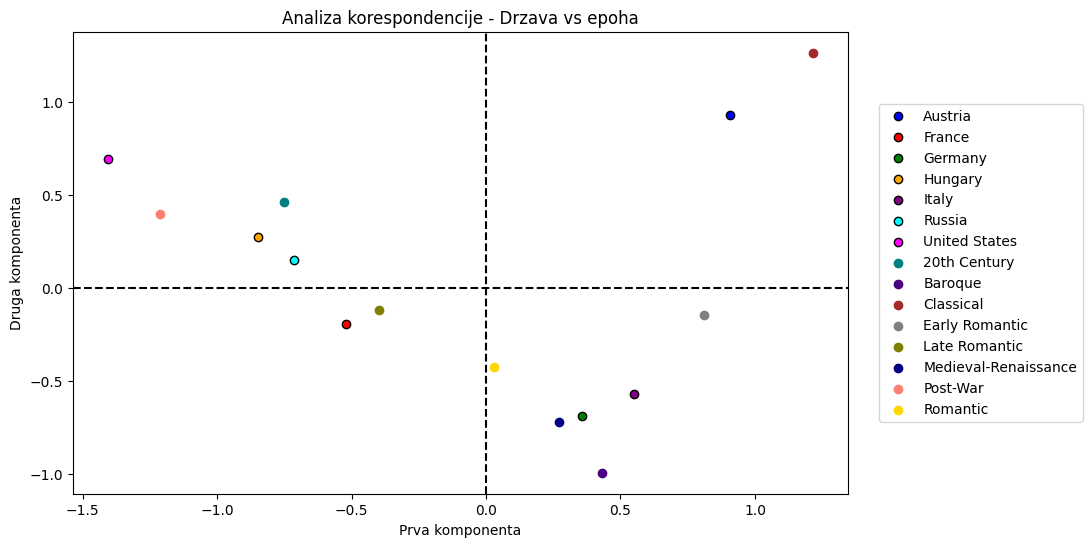

In [70]:
drzave=["Germany", "Austria", "Italy", "France", "Hungary", "Russia", "United States"]
odabrani_df = df[df['country'].isin(drzave)]

contingency_table = pd.crosstab(odabrani_df['country'], odabrani_df['epoch'])

ak = prince.CA(n_components=2)
ak.fit(contingency_table)

redovi = ak.row_coordinates(contingency_table)
stupci = ak.column_coordinates(contingency_table)

drzave = contingency_table.index.tolist()
epohe = contingency_table.columns.tolist()

x_drzave = redovi.iloc[:, 0]
y_drzave = redovi.iloc[:, 1]
x_epohe = stupci.iloc[:, 0]
y_epohe = stupci.iloc[:, 1]

boje_drzave = ['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'lime', 'pink']
boje_epohe = ['teal', 'indigo', 'brown', 'gray', 'olive', 'navy', 'salmon','gold', 'orchid', 'turquoise']

plt.figure(figsize=(10, 6))
for i, drzava in enumerate(drzave):
    plt.scatter(x_drzave[i], y_drzave[i], c=boje_drzave[i], label=drzava, edgecolors='black')

for i, epoha in enumerate(epohe):
    plt.scatter(x_epohe[i], y_epohe[i], c=boje_epohe[i], label=epoha)

plt.axhline(0, color='black', linestyle='dashed')
plt.axvline(0, color='black', linestyle='dashed')

plt.xlabel("Prva komponenta")
plt.ylabel("Druga komponenta")
plt.title("Analiza korespondencije - Drzava vs epoha")
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show()

In [61]:
ak.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,1.000,37.77%,37.77%
1,1.000,37.77%,75.54%


In [60]:
print("Total Inertia:" + str(ak.total_inertia_))

Total Inertia:2.6477734877734873


Moze se zakljuciti da klasična glazba dolazi iz Austrije, a nove i poljeratne stvari iz SAD-a. Iz grafa s emogu zakljuciti stvari iz kontingencijske tablice.

Ovo ispod je koristenjem reduciranog skupa podataka:

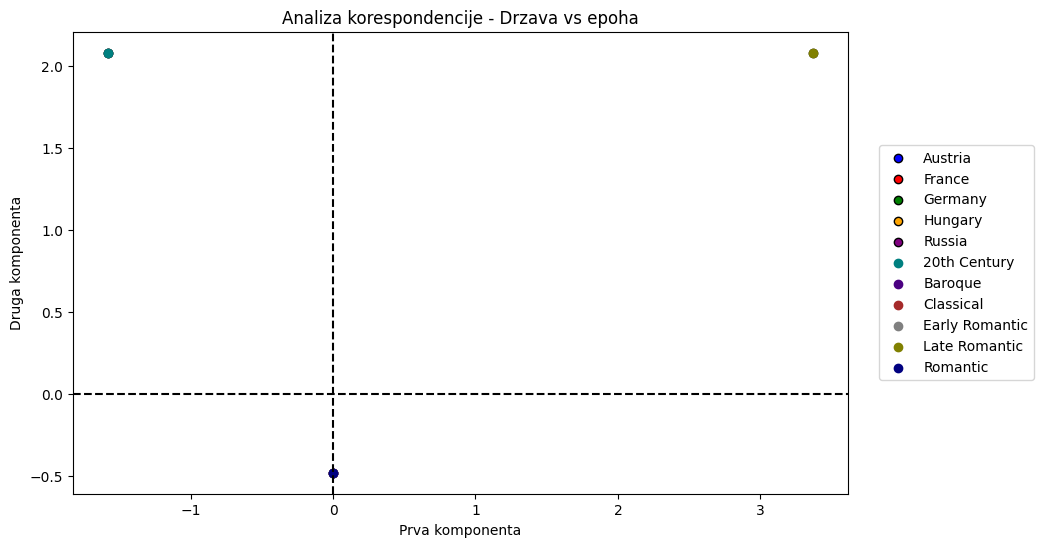

In [71]:
drzave=["Germany", "Austria", "Italy", "France", "Hungary", "Russia", "United States"]
odabrani_df = final_df[final_df['country'].isin(drzave)]

contingency_table = pd.crosstab(odabrani_df['country'], odabrani_df['epoch'])

ak = prince.CA(n_components=2)
ak.fit(contingency_table)

redovi = ak.row_coordinates(contingency_table)
stupci = ak.column_coordinates(contingency_table)

drzave = contingency_table.index.tolist()
epohe = contingency_table.columns.tolist()

x_drzave = redovi.iloc[:, 0]
y_drzave = redovi.iloc[:, 1]
x_epohe = stupci.iloc[:, 0]
y_epohe = stupci.iloc[:, 1]

boje_drzave = ['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'lime', 'pink']
boje_epohe = ['teal', 'indigo', 'brown', 'gray', 'olive', 'navy', 'salmon','gold', 'orchid', 'turquoise']

plt.figure(figsize=(10, 6))
for i, drzava in enumerate(drzave):
    plt.scatter(x_drzave[i], y_drzave[i], c=boje_drzave[i], label=drzava, edgecolors='black')

for i, epoha in enumerate(epohe):
    plt.scatter(x_epohe[i], y_epohe[i], c=boje_epohe[i], label=epoha)

plt.axhline(0, color='black', linestyle='dashed')
plt.axvline(0, color='black', linestyle='dashed')

plt.xlabel("Prva komponenta")
plt.ylabel("Druga komponenta")
plt.title("Analiza korespondencije - Drzava vs epoha")
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show()

In [66]:
ak.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,1.000,37.77%,37.77%
1,1.000,37.77%,75.54%


In [67]:
print("Total Inertia:" + str(ak.total_inertia_))

Total Inertia:2.6477734877734873
